In [1]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import MWETokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [26]:
import re
import string
from re import sub

with open('laskar.txt', encoding='utf-8') as file:
    data = file.read().replace('\n', ' ').replace('\x0c', '')

data = re.sub(r'[^\w\s\-]','',data) # removes anything besides alphabets, digits, whitespace, and -
data = re.sub(r'[\-]',' ',data) # substitutes - with whitespace
data = re.sub("\d+", "", data) # removes digits
data = re.sub("\s{2,}", " ", data) # removes any large whitespaces

# data = data.translate(str.maketrans('','',string.punctuation))

data = data.lower()

In [3]:
words = word_tokenize(data)

stop_words = set(stopwords.words("indonesian"))

filtered_words = []

for w in words:
    if w not in stop_words:
        if w != "vwx":
            filtered_words.append(w)

In [4]:
# test = {"Before":[],"After":[]}

# test["Before"].append("Test")
# test["After"].append("Testing")

# test["Before"].append("Hello")
# test["After"].append("Hi")

In [5]:
# t = "Check"

# for w in :
#     if t not in w:
#         test["Before"].append(t)
#         test["After"].append("Checking")
#         t = "Hello"
        
# print(test)    

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed = []

final_word_list = []
count = 0
not_stemmed = 0

for w in filtered_words:
    hasil = stemmer.stem(w)
    
    if not hasil:
        count += 1
    else:
        count += 1
        
        if w == hasil:
            if hasil not in final_word_list:
                not_stemmed += 1
        else:
            if not any(w in x for x in stemmed):
                stemmed.append([w, hasil])
            
        final_word_list.append(hasil)

In [7]:
if any("berabad" in x for x in stemmed):
    print("true")

true


In [8]:
print(str(not_stemmed) + " not stemmed out of " + str(count))

import pandas as pd

stemmed = pd.DataFrame(stemmed)
stemmed.columns = ['Before', 'After']
stemmed = stemmed.sort_values('After')
stemmed.to_csv(r'Stemmed.csv', index=False)

5778 not stemmed out of 54531


In [9]:
bi_words = nltk.bigrams(final_word_list)
tri_words = nltk.trigrams(final_word_list)

finale_words_bi = []
finale_words_tri = []

for w in bi_words:
    finale_words_bi.append(" ".join(w))
    
for w in tri_words:
    finale_words_tri.append(" ".join(w))

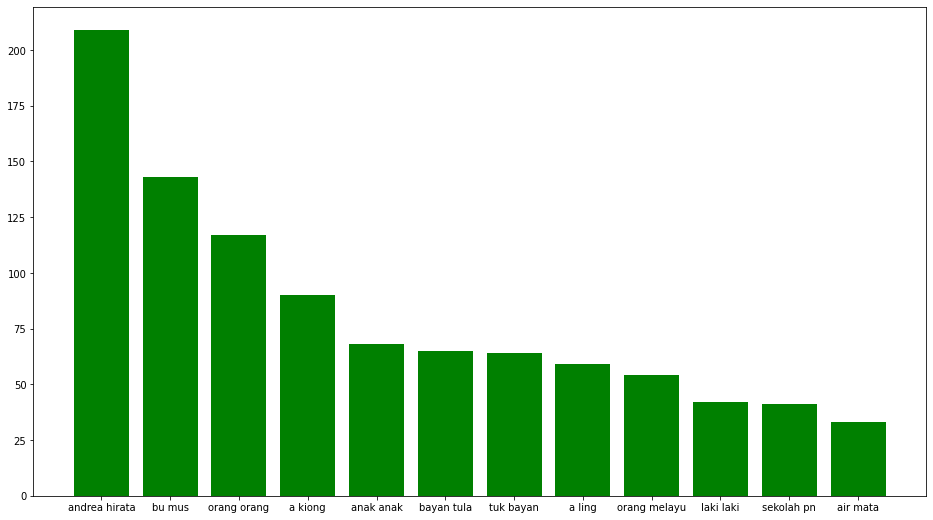

In [24]:
from nltk.probability import FreqDist

# frequency of Bigrams
n_freq_bi = nltk.FreqDist(finale_words_bi)

# Bigrams
n_freq_bi = pd.DataFrame.from_dict(n_freq_bi, orient='index')

n_freq_bi.columns = ['Frequency']
n_freq_bi.index.name = '2Words'

n_freq_bi = n_freq_bi.sort_values('Frequency', ascending=False)

n_freq_bi.to_csv(r'Bigrams.csv')

df_bi = n_freq_bi.head(12)

import matplotlib.pyplot as plt

plt.bar(df_bi.index, df_bi['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

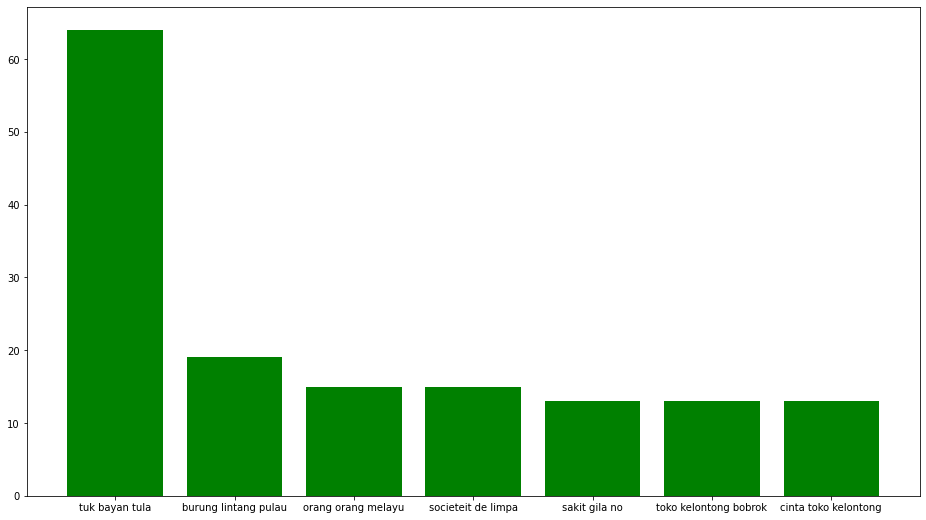

In [11]:
# frequency of Trigrams
n_freq_tri = nltk.FreqDist(finale_words_tri)

# Trigrams
n_freq_tri = pd.DataFrame.from_dict(n_freq_tri, orient='index')

n_freq_tri.columns = ['Frequency']
n_freq_tri.index.name = '3Words'

n_freq_tri = n_freq_tri.sort_values('Frequency', ascending=False)

n_freq_tri.to_csv(r'Trigrams.csv')

df_tri = n_freq_tri.head(7)

plt.bar(df_tri.index, df_tri['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

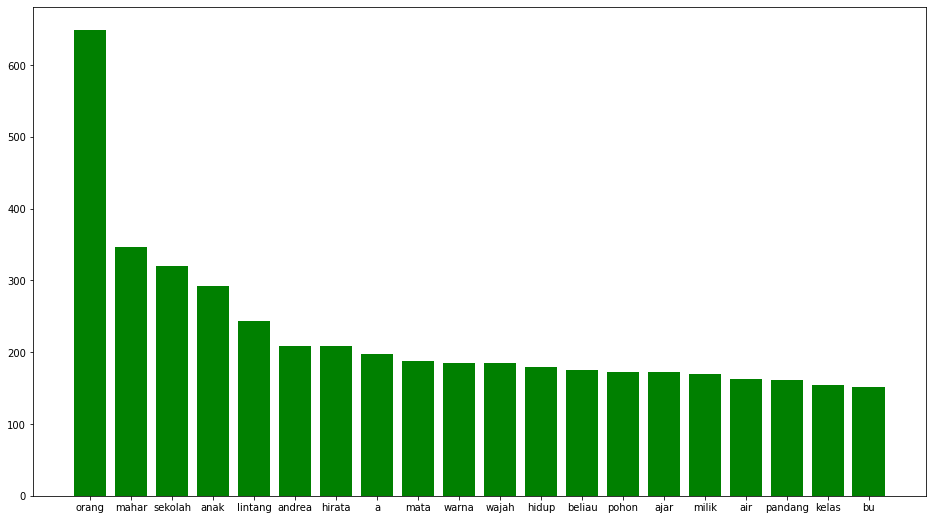

In [12]:
# frequencies of every single word

freq_tokens = nltk.FreqDist(final_word_list)

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')

df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens = df_freq_tokens.sort_values('Frequency', ascending=False)

df_freq_tokens.to_csv(r'Check.csv')

#print(df_freq_tokens)

df2 = df_freq_tokens.head(20)

plt.bar(df2.index, df2['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [13]:
from gensim.models import Word2Vec

model_cbow = Word2Vec([final_word_list], min_count=1, sg=0) # CBOW
model_cbow_wd = Word2Vec([final_word_list], min_count=1, window=10, sg=0) # Increased the window size from 5 -> 10
model_cbow_dim = Word2Vec([final_word_list], min_count=1, size=20, sg=0) # Decreased the dimension from 100 -> 20
model_cbow_work = Word2Vec([final_word_list], min_count=1, workers=10, sg=0) # Decreased the dimension from 100 -> 20
model_skip = Word2Vec([final_word_list], min_count=1, sg=1) # Skip Gram

In [14]:
model_cbow.most_similar("sekolah")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pn', 0.581272304058075),
 ('anak', 0.5683953762054443),
 ('burung', 0.5438601970672607),
 ('guru', 0.5247033834457397),
 ('kelas', 0.5095686912536621),
 ('ajar', 0.4818626642227173),
 ('timah', 0.47995859384536743),
 ('nama', 0.4760212302207947),
 ('ekor', 0.43689680099487305),
 ('puluh', 0.4267892837524414)]

In [15]:
model_cbow_wd.most_similar("sekolah")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('anak', 0.8658651113510132),
 ('pn', 0.8596298098564148),
 ('kelas', 0.8398569822311401),
 ('nama', 0.8298984169960022),
 ('orang', 0.8087044358253479),
 ('timah', 0.8080693483352661),
 ('burung', 0.7945009469985962),
 ('guru', 0.7927939295768738),
 ('beliau', 0.7899117469787598),
 ('ajar', 0.7895417213439941)]

In [16]:
model_cbow["anak"]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 4.4852630e-03,  3.8916569e-03,  5.8130980e-03, -5.7027158e-03,
       -8.9423861e-03, -5.8868574e-03, -1.6310966e-03, -4.8735063e-03,
       -2.7408830e-03, -1.7817030e-03,  5.2116034e-03, -1.5973706e-04,
       -6.3949553e-03, -2.7825646e-03,  6.9124876e-03,  9.9711709e-05,
        1.1263856e-03,  4.2328341e-03, -1.2739918e-05,  4.1875532e-03,
       -2.3439846e-03, -4.0369146e-03,  5.8252527e-03, -1.0003668e-03,
        8.2231028e-04,  4.7097001e-03, -3.9375550e-04,  3.6341377e-04,
        6.6334801e-03,  2.5139404e-03, -4.3567824e-03,  5.4721395e-03,
        1.6755420e-03, -7.2490545e-03,  3.4032720e-03,  6.5464119e-05,
       -4.5368094e-03, -6.1385753e-03,  2.3120830e-03,  1.2270567e-03,
        6.0660443e-03,  3.8417257e-04, -5.2515767e-03, -1.0661060e-04,
       -5.4872981e-03, -4.5860829e-03, -5.8361894e-04,  3.6951154e-03,
        6.6769440e-03,  7.2165852e-04, -3.1512794e-03,  1.5052380e-03,
        1.9067123e-03,  3.1947377e-04, -7.8248873e-04,  1.3927281e-03,
      

In [17]:
model_cbow_dim["anak"]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.2420328e-02,  1.9426944e-02,  2.9061658e-02, -2.8491328e-02,
       -4.4685271e-02, -2.9420746e-02, -8.1531899e-03, -2.4347637e-02,
       -1.3703879e-02, -8.9175366e-03,  2.6047396e-02, -8.0802455e-04,
       -3.1964168e-02, -1.3916365e-02,  3.4541152e-02,  4.8775729e-04,
        5.6387438e-03,  2.1161335e-02, -4.9351260e-05,  2.0914558e-02],
      dtype=float32)

In [18]:
model_cbow_dim.most_similar("sekolah")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('besok', 0.8193202018737793),
 ('ajang', 0.7999286651611328),
 ('paham', 0.7298377156257629),
 ('piring', 0.7149156332015991),
 ('anak', 0.6916177868843079),
 ('pria', 0.6540687680244446),
 ('kuli', 0.6530314087867737),
 ('gancu', 0.6498304605484009),
 ('georgia', 0.6489354372024536),
 ('saksi', 0.643229603767395)]

In [19]:
model_cbow_work.most_similar("sekolah")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pn', 0.581272304058075),
 ('anak', 0.5683953762054443),
 ('burung', 0.5438601970672607),
 ('guru', 0.5247033834457397),
 ('kelas', 0.5095686912536621),
 ('ajar', 0.4818626642227173),
 ('timah', 0.47995859384536743),
 ('nama', 0.4760212302207947),
 ('ekor', 0.43689680099487305),
 ('puluh', 0.4267892837524414)]

In [20]:
model_skip.most_similar("sekolah")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('pn', 0.9986884593963623),
 ('anak', 0.9980896711349487),
 ('guru', 0.9980697631835938),
 ('orang', 0.9980248212814331),
 ('kelas', 0.9978797435760498),
 ('ajar', 0.9978660345077515),
 ('milik', 0.9975475072860718),
 ('timah', 0.9975470304489136),
 ('beliau', 0.9975343346595764),
 ('jalan', 0.9973447322845459)]

In [21]:
import numpy as np
from numpy.linalg import norm

def cosine_distance(model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

Maker_Model = []

for w in final_word_list:
    if w not in Maker_Model:
        Maker_Model.append(w)
        
cosine_distance(model_skip,'sekolah',Maker_Model,5)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[('pn', 0.99868846),
 ('anak', 0.9980897),
 ('guru', 0.99806994),
 ('orang', 0.99802464),
 ('kelas', 0.9978796)]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


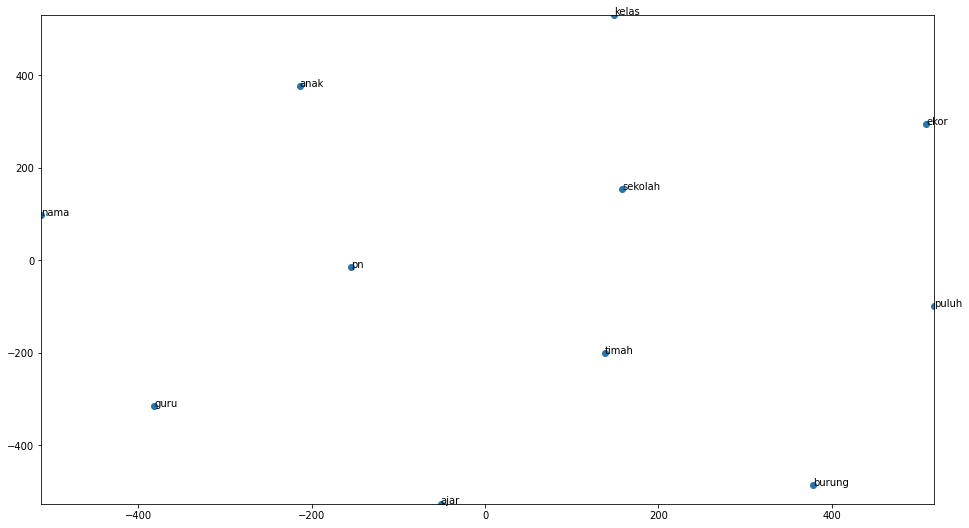

In [22]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    
    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model_cbow, 'sekolah', 100) 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


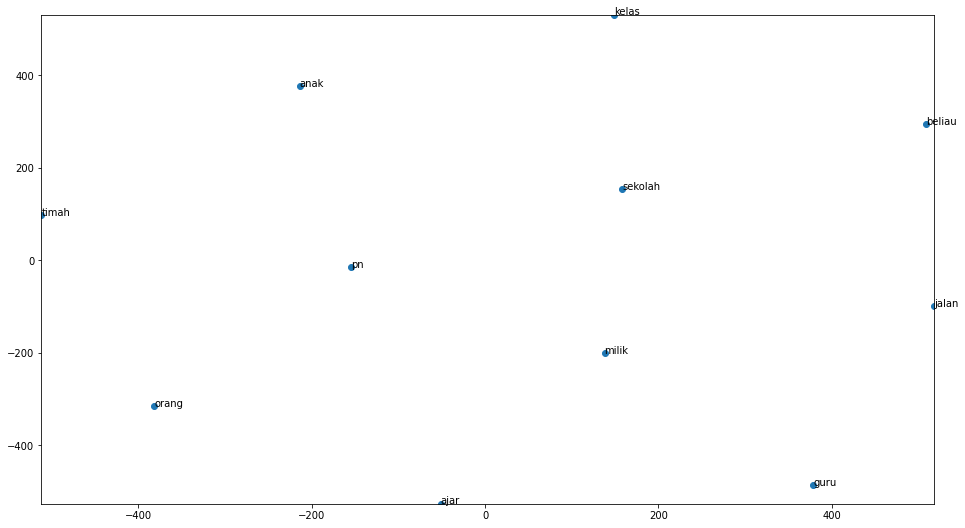

In [23]:
display_closestwords_tsnescatterplot(model_skip, 'sekolah', 100) 